In [1]:
import pandas as pd
import numpy as np
import operator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Robot1", header=None, delim_whitespace=True)
data.columns = ['class','a1','a2','a3','a4','a5','a6','Id']
data.head()

,class,a1,a2,a3,a4,a5,a6,Id
0,1,1,1,1,1,3,1,data_5
1,1,1,1,1,1,3,2,data_6
2,1,1,1,1,3,2,1,data_19
3,1,1,1,1,3,3,2,data_22
4,1,1,1,2,1,2,1,data_27


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    data[['class']],
    test_size=0.2,
    random_state=0)

In [4]:
class KNearestNeighbors:
    def compute_accuracy(self,y_actual, y_predict):
        y_actual = list(y_actual)
        y_predict = list(y_predict)
        hits = 0
        for i in range(0,len(y_actual)):
            if y_actual[i] == y_predict[i]:
                hits+=1
        return float(hits)/float(len(y_actual))
    def predict(self,train_data, predict_data, k):
        dist_dict = dict()
        id_class_dict = dict()
        inc_cols = ['a1','a2','a3','a4','a5','a6']
        predict_class = list()
        for predict_index,predict_row in predict_data.iterrows():
            for train_index,train_row in train_data.iterrows():
                if train_row['Id']==predict_row['Id']:
                    continue
                d = np.sqrt(np.sum(np.square(np.subtract(np.array(train_row[inc_cols]),np.array(predict_row[inc_cols])))))
                dist_dict[train_row['Id']] = d
                id_class_dict[train_row['Id']] = train_row['class']
            sorted_dist = sorted(dist_dict.items(), key=operator.itemgetter(1))[:k]
            class_dict = dict()
            for d in sorted_dist:
                c = id_class_dict[d[0]]
                if c in class_dict:
                    class_dict[c] += 1
                else:
                    class_dict[c] = 1
            max_class = max(class_dict, key=class_dict.get)
            predict_class.append(max_class)
        return predict_class

In [5]:
knn = KNearestNeighbors()
m = len(X_train)
# max_k = int(np.sqrt(m)) + 1
max_k = m-1
best_train_acc = 0
best_test_acc = 0
best_ratio = 0
best_k = 0
ks = list()
train_accs = list()
test_accs = list()
for k in range(1,(max_k+1)):
    ks.append(k)
    
    train_pred = knn.predict(X_train,X_train,k)
    train_acc = knn.compute_accuracy(X_train['class'],train_pred)
    
    test_pred = knn.predict(X_train,X_test,k)
    test_acc = knn.compute_accuracy(X_test['class'],test_pred)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    ratio = 1.0/((1.0/float(train_acc)) + (1.0/float(test_acc)))
    if ratio > best_ratio:
        best_ratio = ratio
        best_train_acc = train_acc
        best_test_acc = test_acc
        best_k = k

print '**************Robot1 Dataset******************'
print 'Best K : '+str(best_k)
print 'Best Train Accuracy : '+str(best_train_acc)
print 'Best Test Accuracy : '+str(best_test_acc)
print 'Best ratio : '+str(best_ratio)
print '**********************************************'

**************Robot1 Dataset******************
Best K : 7
Best Train Accuracy : 0.808080808081
Best Test Accuracy : 0.84
Best ratio : 0.411865653346
**********************************************


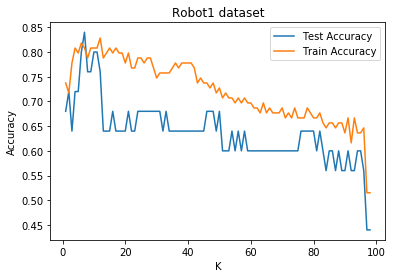

In [6]:
df = pd.DataFrame({'Train Accuracy': train_accs, 'Test Accuracy':test_accs}, index=ks)
lines = df.plot.line()
lines.set_title('Robot1 dataset')
lines.set_xlabel('K')
lines.set_ylabel('Accuracy')

In [7]:
data = pd.read_csv("Robot2", header=None, delim_whitespace=True)
data.columns = ['class','a1','a2','a3','a4','a5','a6','Id']
data.head()

,class,a1,a2,a3,a4,a5,a6,Id
0,1,1,1,1,1,1,2,data_2
1,1,1,1,1,1,2,1,data_3
2,1,1,1,1,1,2,2,data_4
3,0,1,1,1,1,3,1,data_5
4,0,1,1,1,1,4,1,data_7


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    data[['class']],
    test_size=0.2,
    random_state=0)

In [9]:
knn = KNearestNeighbors()
m = len(X_train)
# max_k = int(np.sqrt(m)) + 1
max_k = m-1
best_train_acc = 0
best_test_acc = 0
best_ratio = 0
best_k = 0
ks = list()
train_accs = list()
test_accs = list()
for k in range(1,(max_k+1)):
    ks.append(k)
    
    train_pred = knn.predict(X_train,X_train,k)
    train_acc = knn.compute_accuracy(X_train['class'],train_pred)
    
    test_pred = knn.predict(X_train,X_test,k)
    test_acc = knn.compute_accuracy(X_test['class'],test_pred)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    ratio = 1.0/((1.0/float(train_acc)) + (1.0/float(test_acc)))
    if ratio > best_ratio:
        best_ratio = ratio
        best_train_acc = train_acc
        best_test_acc = test_acc
        best_k = k

print '**************Robot2 Dataset******************'
print 'Best K : '+str(best_k)
print 'Best Train Accuracy : '+str(best_train_acc)
print 'Best Test Accuracy : '+str(best_test_acc)
print 'Best ratio : '+str(best_ratio)
print '**********************************************'


**************Robot2 Dataset******************
Best K : 3
Best Train Accuracy : 0.845360824742
Best Test Accuracy : 1.0
Best ratio : 0.458100558659
**********************************************


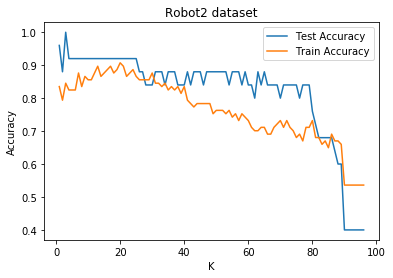

In [10]:
df = pd.DataFrame({'Train Accuracy': train_accs, 'Test Accuracy':test_accs}, index=ks)
lines = df.plot.line()
lines.set_title('Robot2 dataset')
lines.set_xlabel('K')
lines.set_ylabel('Accuracy')

In [11]:
data = pd.read_csv("Iris.csv", header=None)
data.columns = ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class']
data['Id'] = range(1, len(data) + 1)
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class,Id
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,6.3,3.3,6.0,2.5,Iris-virginica,2
2,5.0,3.0,1.6,0.2,Iris-setosa,3
3,6.2,2.8,4.8,1.8,Iris-virginica,4
4,6.4,3.1,5.5,1.8,Iris-virginica,5


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    data[['class']],
    test_size=0.2,
    random_state=0)

In [13]:
class KNearestNeighbors:
    def compute_accuracy(self,y_actual, y_predict):
        y_actual = list(y_actual)
        y_predict = list(y_predict)
        hits = 0
        for i in range(0,len(y_actual)):
            if y_actual[i] == y_predict[i]:
                hits+=1
        return float(hits)/float(len(y_actual))
    def predict(self,train_data, predict_data, k):
        dist_dict = dict()
        id_class_dict = dict()
        inc_cols = ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']
        predict_class = list()
        for predict_index,predict_row in predict_data.iterrows():
            for train_index,train_row in train_data.iterrows():
                if train_row['Id']==predict_row['Id']:
                    continue
                d = np.sqrt(np.sum(np.square(np.subtract(np.array(train_row[inc_cols]),np.array(predict_row[inc_cols])))))
                dist_dict[train_row['Id']] = d
                id_class_dict[train_row['Id']] = train_row['class']
            sorted_dist = sorted(dist_dict.items(), key=operator.itemgetter(1))[:k]
            class_dict = dict()
            for d in sorted_dist:
                c = id_class_dict[d[0]]
                if c in class_dict:
                    class_dict[c] += 1
                else:
                    class_dict[c] = 1
            max_class = max(class_dict, key=class_dict.get)
            predict_class.append(max_class)
        return predict_class

In [14]:
knn = KNearestNeighbors()
m = len(X_train)
# max_k = int(np.sqrt(m)) + 1
max_k = m-1
best_train_acc = 0
best_test_acc = 0
best_ratio = 0
best_k = 0
ks = list()
train_accs = list()
test_accs = list()
for k in range(1,(max_k+1)):
    ks.append(k)
    
    train_pred = knn.predict(X_train,X_train,k)
    train_acc = knn.compute_accuracy(X_train['class'],train_pred)
    
    test_pred = knn.predict(X_train,X_test,k)
    test_acc = knn.compute_accuracy(X_test['class'],test_pred)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    ratio = 1.0/((1.0/float(train_acc)) + (1.0/float(test_acc)))
    if ratio > best_ratio:
        best_ratio = ratio
        best_train_acc = train_acc
        best_test_acc = test_acc
        best_k = k

print '**************Iris Dataset******************'
print 'Best K : '+str(best_k)
print 'Best Train Accuracy : '+str(best_train_acc)
print 'Best Test Accuracy : '+str(best_test_acc)
print 'Best ratio : '+str(best_ratio)
print '**********************************************'

**************Iris Dataset******************
Best K : 9
Best Train Accuracy : 0.962962962963
Best Test Accuracy : 1.0
Best ratio : 0.490566037736
**********************************************


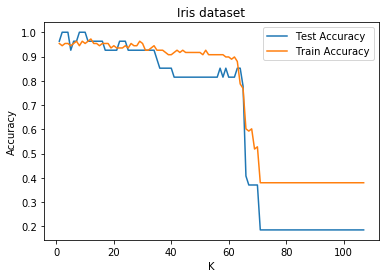

In [15]:
df = pd.DataFrame({'Train Accuracy': train_accs, 'Test Accuracy':test_accs}, index=ks)
lines = df.plot.line()
lines.set_title('Iris dataset')
lines.set_xlabel('K')
lines.set_ylabel('Accuracy')